In [7]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [13]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
boston_dataset = pd.read_csv(url)
boston_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
boston_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: >

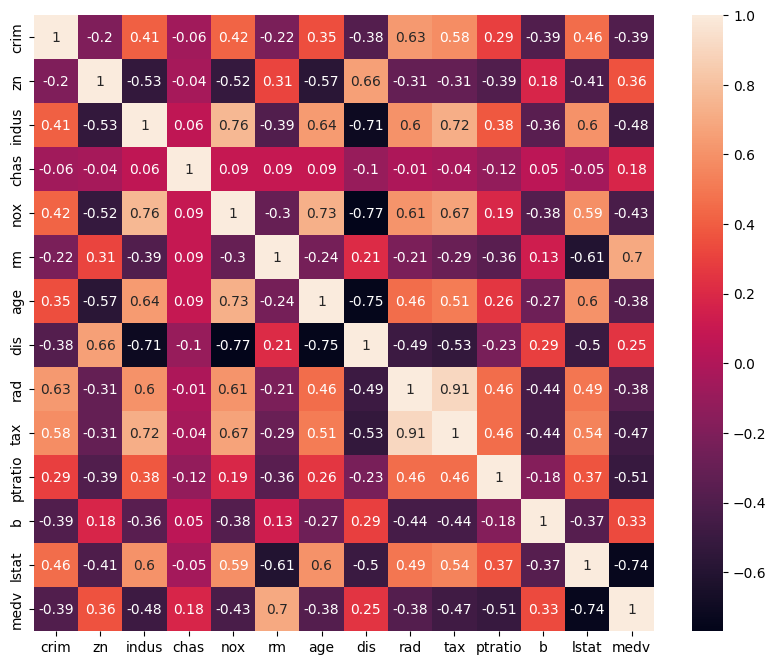

In [21]:
correlation_matrix = boston_dataset.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True)

Text(0.5, 1.0, 'Среднее количество комнат и цены на жилье')

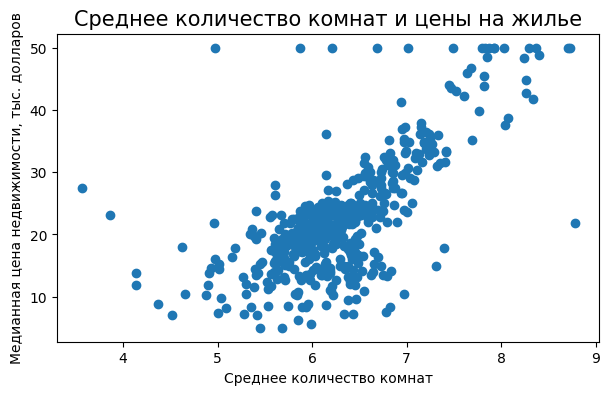

In [68]:
rm = pd.DataFrame(boston_dataset['rm'])
lstat = pd.DataFrame(boston_dataset['lstat'])
medv = pd.DataFrame(boston_dataset['medv'])

plt.figure(figsize=(7, 4))
plt.scatter(rm, medv)
plt.xlabel('Среднее количество комнат', fontsize = 10)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 10)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 15)

Text(0.5, 1.0, 'Социальный статус населения и цены на жилье')

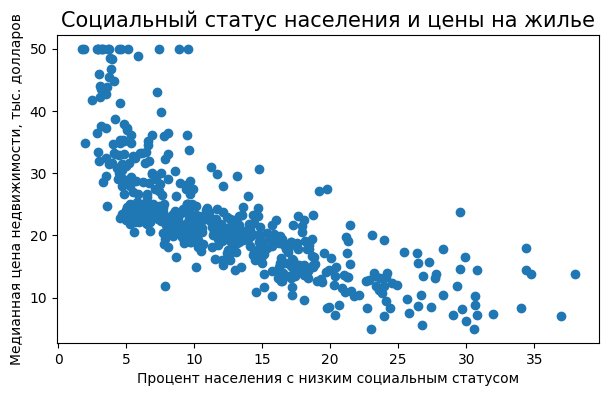

In [69]:
plt.figure(figsize=(7, 4))
plt.scatter(lstat, medv)
plt.xlabel('Процент населения с низким социальным статусом', fontsize = 10)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 10)
plt.title('Социальный статус населения и цены на жилье', fontsize = 15)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
xrm_train, xrm_test, yrm_train, yrm_test = train_test_split(rm, medv, test_size=0.2)

lin_reg = LinearRegression()
lin_reg.fit(xrm_train, yrm_train)

yrm_pred = lin_reg.predict(xrm_test)

a = float(lin_reg.coef_[0])
b = float(lin_reg.intercept_[0])
a, b

(9.428886647539668, -36.76007690765414)

Text(0.5, 1.0, 'Среднее количество комнат и цены на жилье')

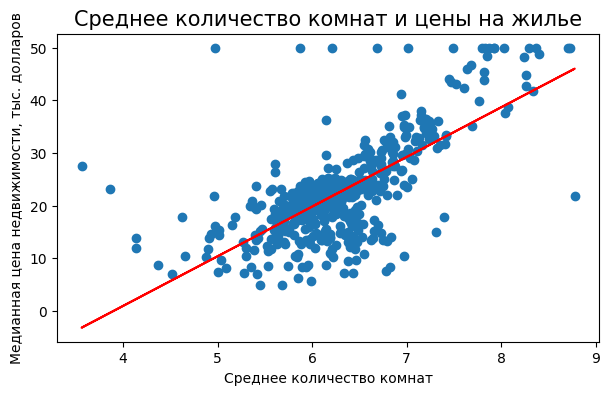

In [84]:
plt.figure(figsize=(7, 4))
plt.scatter(rm, medv)
plt.plot(rm, rm * a + b, 'r', markersize=10)
plt.xlabel('Среднее количество комнат', fontsize = 10)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 10)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 15)

In [88]:
print("Root Mean Squarred Error: ", np.sqrt(mean_squared_error(yrm_test, yrm_pred)))
print("Mean Absolute Error: ", mean_absolute_error(yrm_test, yrm_pred))
print("Determination coefficient: ", r2_score(yrm_test, yrm_pred))

Root Mean Squarred Error:  7.630319906693914
Mean Absolute Error:  5.007950246129307
Determination coefficient:  0.32626408755371583


In [104]:
xlstat_train, xlstat_test, ylstat_train, ylstat_test = train_test_split(lstat, medv, train_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(xlstat_train, ylstat_train)

ylstat_pred = lin_reg.predict(xlstat_test)
c = float(lin_reg.coef_[0])
d = float(lin_reg.intercept_[0])
c,d

(-1.0005022408638078, 35.04724062950763)

Text(0.5, 1.0, 'Социальный статус населения и цены на жилье')

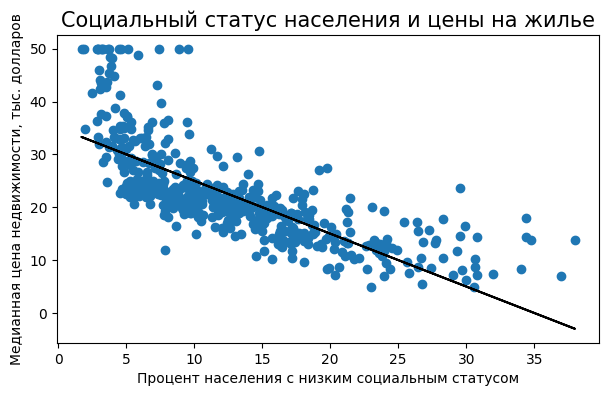

In [105]:
plt.figure(figsize=(7, 4))
plt.plot(lstat, c * lstat + d, 'black', markersize=10)
plt.scatter(lstat, medv)
plt.xlabel('Процент населения с низким социальным статусом', fontsize = 10)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 10)
plt.title('Социальный статус населения и цены на жилье', fontsize = 15)

In [106]:
print("Root Mean Squarred Error: ", np.sqrt(mean_squared_error(ylstat_test, ylstat_pred)))
print("Mean Absolute Error: ", mean_absolute_error(ylstat_test, ylstat_pred))
print("Determination coefficient: ", r2_score(ylstat_test, ylstat_pred))

Root Mean Squarred Error:  6.223364285657744
Mean Absolute Error:  4.56689103684198
Determination coefficient:  0.5488893114729416


In [95]:
x = boston_dataset[['rm', 'lstat', 'ptratio', 'tax', 'indus']]
y = boston_dataset[['medv']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [98]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

array([[26.62981059],
       [31.10008241],
       [16.95701338],
       [25.59771173],
       [18.09307064]])

In [99]:
print("Root Mean Squarred Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Determination coefficient: ", r2_score(y_test, y_pred))

Root Mean Squarred Error:  5.107447670220913
Mean Absolute Error:  3.562646590451596
Determination coefficient:  0.6499135956539921
